In [1]:
import numpy as np
import cv2
# from moviepy.editor import VideoFileClip
from IPython.display import clear_output, Image, display, HTML
import matplotlib.pyplot as plt


## Clip a shorter video segment (if desired)

In [2]:
# set bounds on clip
init_frame = 940
fin_frame = 1400

In [4]:

# desired video to work with
video_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes/plume_videos/July_20/video_low_1/low_1.MP4"

video = cv2.VideoCapture(video_path)

ret, frame = video.read()

# grabs video info for saving new file
frame_width = int(video.get(3))
frame_height = int(video.get(4))
frame_rate = int(video.get(5))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# file name for clip file output
clip_title = 'low_1_clip.mp4'
out = cv2.VideoWriter(clip_title,fourcc, frame_rate, (frame_width,frame_height),0)

# comment out anything with "display_handle" if viewing the video is not desired
display_handle=display(None, display_id=True)

#loop that results in the writing of B&W shortened video clip
k=0
try:
    while ret:
        if k<fin_frame and k>=init_frame:

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            out.write(frame)
            _, frame = cv2.imencode('.jpeg', frame)
            
            display_handle.update(Image(data=frame.tobytes()))
            
        k+=1
        ret, frame = video.read()
except KeyboardInterrupt:
    pass
finally:

    video.release()
    out.release()
    display_handle.update(None)

None

In [5]:
# checks out number of frames

# video = cv2.VideoCapture(clip_title)

# img_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
# video.release()
# print(img_count)

460.0


## Fixed Avg
### Create Background Avg

In [5]:
# desired video to work with
video_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes/plume_videos/July_20/video_low_1/low_1.MP4"
video = cv2.VideoCapture(video_path)

# set number of frames to average
img_count = 600.

In [6]:
ret, frame = video.read()

background_img_np =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(float)

# sum up the frames in B&W in the form of numpy arrays
# takes 'img_count' frames from the beginnning of the video clip
k=0
try:
    while ret:
        if k<img_count:
            background_img_np += cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(float)
       
        k+=1
        ret, frame = video.read()
except KeyboardInterrupt:
    pass
finally:
    video.release()

# takes average
background_img_np = (background_img_np/img_count).astype(np.uint8)

#save numpy array if desired for later use
#np.save("low_1_fixed_bg.npy", background_img_np)


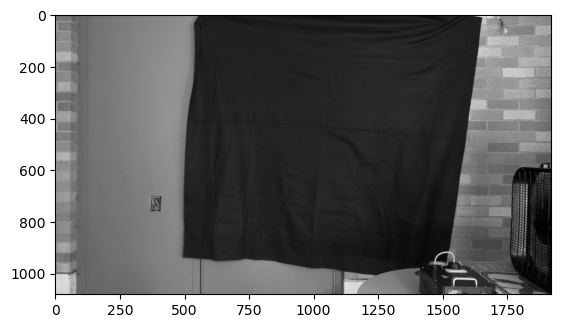

In [7]:
# display final background image
plt.imshow(background_img_np, cmap="gray")
plt.show()

### Remove Background

In [9]:
# grab desired video clip to remove the fixed background (recommend shortened clip to save time)
video = cv2.VideoCapture(clip_title)

# load presaved numpy array for background
# background_img_np = np.load("low_1_fixed_bg.npy")

# grabs video info for saving new file
frame_width = int(video.get(3))
frame_height = int(video.get(4))
frame_rate = int(video.get(5))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

#name your background removed file
fxd_bg_result = 'fxd_low_1.mp4'
out = cv2.VideoWriter(fxd_bg_result,fourcc, frame_rate, (frame_width,frame_height),0)


# loop should remove fixed background and save a B&W video of the result
try:
    while True:
        ret, frame = video.read()
        if ret==False:

            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # removes background from frame
        subtracted_img = cv2.subtract(frame.astype(np.uint8), background_img_np)

        # Invert image color (if desired)
        # subtracted_img=np.invert(subtracted_img)
        
        out.write(subtracted_img)
except KeyboardInterrupt:
    pass
finally:
    video.release()
    out.release()

    display_handle.update(None)

## Moving Avg

In [10]:
# set bounds on clip
init_frame = 940
fin_frame = 1400

#number of frames to average for the moving average 
median_count = 300



In [11]:
# !!! WARNING: THIS PROCESS TAKES A WHILE !!!

# Took ~25 min for HD video of 3 seconds

video = cv2.VideoCapture("C:/Users/laure/Documents/ARA/low_1.MP4")

# grabs video info for saving new file
frame_width = int(video.get(3))
frame_height = int(video.get(4))
frame_rate = int(video.get(5))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# name of the clip of the changing background over time
removal_clip_name = 'moving_removal_clip_300.mp4'
out = cv2.VideoWriter(removal_clip_name,fourcc, frame_rate, (frame_width,frame_height),0)

ret, frame = video.read()

subtr_frames = np.zeros((1080, 1920,1))

# this loop should save a clip of the moving average for the desired clip. it takes the preceding 'median_count' 
# frames and averages them for each frame in the desired background removed clip.
k=0
try:
    while ret:
        #adds current frame to average if within bounds
        if k<fin_frame and k>=init_frame-median_count:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(float).reshape((frame.shape[0],frame.shape[1],1))
            subtr_frames = np.dstack((subtr_frames,frame))

        #takes mean of current set of frames if within bounds for the desired output clip 
        if k<fin_frame and k>=init_frame:
            # remove first frame from stack, as it is out of bounds for the current average
            subtr_frames = subtr_frames[:,:,1:]

            # take average of frame stack
            background_img_np = np.mean(subtr_frames,axis=2)
            
            background_img_np = background_img_np.astype(np.uint8)

            out.write(background_img_np)
        if k>=fin_frame:
            break
        k+=1
        ret, frame = video.read()

except KeyboardInterrupt:
    pass
finally:
    video.release()
    out.release()
    


In [12]:
# checks out number of frames

video = cv2.VideoCapture(removal_clip_name)

img_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
video.release()
print(img_count)

460.0


In [13]:
video = cv2.VideoCapture(clip_title)
ret, frame = video.read()

remove = cv2.VideoCapture(removal_clip_name)
ret2, rem_frame = remove.read()

# grabs video info for saving new file
frame_width = int(video.get(3))
frame_height = int(video.get(4))
frame_rate = int(video.get(5))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# name of the final moving average background removed clip
moving_bg_end_clip = 'moving_low_1_300.mp4'
out = cv2.VideoWriter(moving_bg_end_clip,fourcc, frame_rate, (frame_width,frame_height),0)

# loop that removes the moving average background 'removal_clip_name' from shortened
# video 'clip_title' which should be identical lengths (fin_frame - init_frame)
# saved result is in B&W and saved as 'moving_bg_end_clip'
k=0
try:
    while ret:
        # if k<fin_frame and k>=init_frame and ret2:
        if ret2:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            subtracted_img = cv2.subtract(frame.astype(np.uint8), cv2.cvtColor(rem_frame, cv2.COLOR_BGR2GRAY))

            # Invert image color (if desired)
            # subtracted_img=np.invert(subtracted_img)
            
            out.write(subtracted_img)
            ret2, rem_frame = remove.read()
        
        k+=1 
        ret, frame = video.read()
        
except KeyboardInterrupt:
    pass
finally:

    video.release()
    out.release()
    remove.release()
